# Arima Modeling

## Data Processing

In [1]:
import dask
from dask.distributed import Client
import dask.dataframe as dd
import time
import json
import numpy as np
import pandas as pd
import os

Get list of yearly files to concat

In [2]:
years=[x for x in os.listdir() if '.csv' in x]
years.remove('1997.csv')

Define Client

In [3]:
client = Client('172.31.17.236:8786') 
client=client.restart()
print(client)

<Client: 'tcp://172.31.17.236:8786' processes=0 threads=0, memory=0 B>


Define helper function to delete columns we don't want and group by Date

In [4]:
def clean_df(dddf):
    '''
    cleans dask dataframe
    dddf: dask dataframe
    '''
    
    #helper funtion to make Classification column 
    def func(row):
        if pd.isnull(row['ArrDelay']):
            return 0
        else:
            if row['ArrDelay']<30:
                    return 1
            else:
                return 0
    
    #apply helper function
    dddf['DelayClass'] = dddf.apply(func, axis=1)
    
    dddf=dddf[['DelayClass', 'Year', 'Month', 'DayofMonth']]
    dddf=dddf.groupby(['Year', 'Month', 'DayofMonth']).mean().compute()
    
    return dddf.reset_index()

Concat yearly files into one dataframe

In [13]:
data=clean_df(dd.read_csv('1997.csv', sample=2**30, assume_missing=True, dtype={'CancellationCode': 'object'}))
for year in years:
    print(year)
    try: 
        data_new=clean_df(dd.read_csv(year, sample=2**30, assume_missing=True, dtype={'CancellationCode': 'object'}))
        data=dd.concat([data, data_new], axis=0).compute()
    except:
        print(year, 'fail')
len(data['DelayClass'])

/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


2006.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


2000.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1990.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


2002.csv
2002.csv fail
1995.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1999.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


2005.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1993.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1989.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


2007.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


2003.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1998.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


2001.csv
2001.csv fail
2004.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1994.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1988.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1996.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1987.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1992.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


2008.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


1991.csv


/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/core.py:5912: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


6788

Make date into more friendly format:

In [14]:
def make_date(row):
    return str(int(row['Year']))+'-'+str(int(row['Month']))+'-'+str(int(row['DayofMonth']))
data['Date']=data.apply(make_date, axis=1)

In [15]:
data=data.rename({'DelayClass':'OnTimeRate'}, axis=1)[['OnTimeRate', 'Date']]
data.head()

,OnTimeRate,Date
0,0.838721,1997-1-1
0,0.744567,2008-1-1
0,0.902745,2005-1-1
0,0.910809,1987-10-1
0,0.928789,1988-1-1


In [16]:
data.sort_values('Date')

,OnTimeRate,Date
0,0.910809,1987-10-1
9,0.952835,1987-10-10
10,0.939230,1987-10-11
11,0.911592,1987-10-12
12,0.933670,1987-10-13
...,...,...
95,0.852820,2008-4-5
96,0.815995,2008-4-6
97,0.884992,2008-4-7
98,0.867246,2008-4-8


## Modeling:

In [17]:
from prophet import Prophet
pddf=pd.DataFrame({'y':data['OnTimeRate'], 'ds':pd.to_datetime(data['Date'])})

### Daily Rates of On-Time Planes

<Axes: xlabel='ds'>

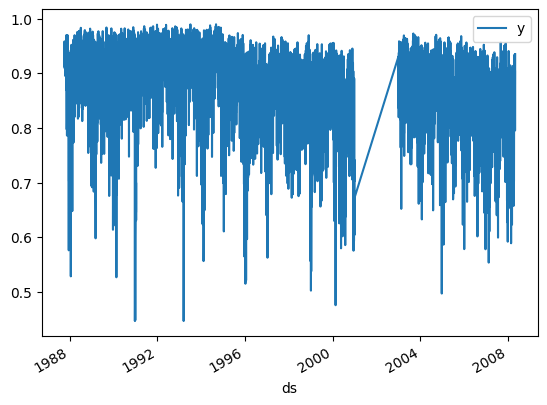

In [18]:
pddf.plot(x='ds', y='y')

In [19]:
m = Prophet(daily_seasonality=True)
m.fit(pddf)

23:58:26 - cmdstanpy - INFO - Chain [1] start processing
23:58:29 - cmdstanpy - INFO - Chain [1] done processing


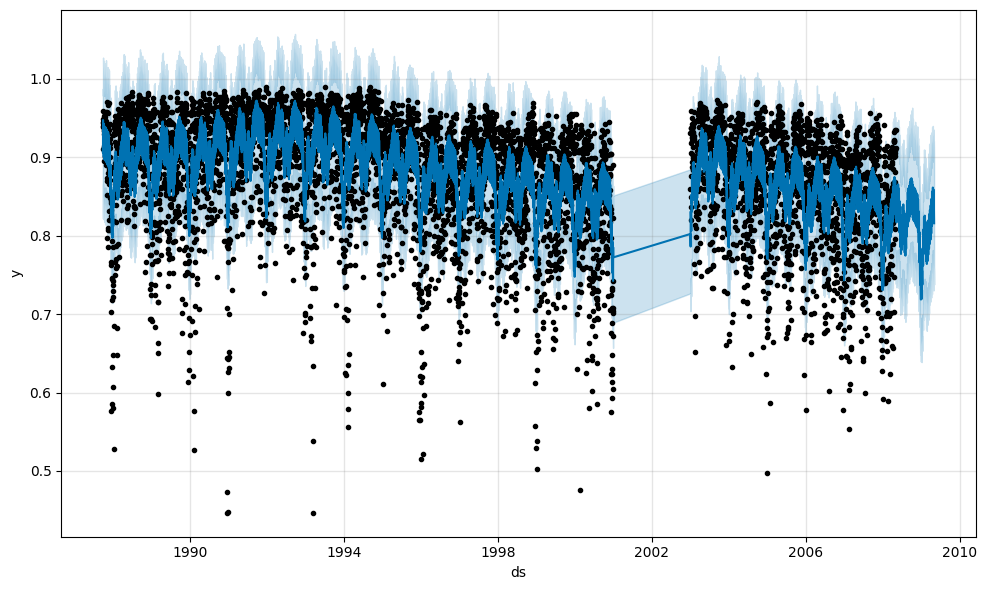

In [20]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast);